In [1]:
import numpy as np
import pandas as pd

In [2]:
# To generate random data
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
X_train, y_train = make_blobs(n_samples = 300, centers = 2, n_features = 2, cluster_std = 6, random_state = 11)

In [3]:
# Feature scaling
class Preprocess():
    def __init__(self):
        pass
    
    def feature_scale(self, dataset):
        '''
        Function to perform feature scaling on all columns of given dataset
        '''
        for column in range(dataset.shape[1]):
            dataset[:, column] = dataset[:, column] / np.std(dataset[:, column])
            
    def mean_normalization(self, dataset):
        '''
        Function to perform mean normalization on all columns of given dataset
        '''
        for column in range(dataset.shape[1]):
            dataset[:, column] = (dataset[:, column] - np.mean(dataset[:, column])) / np.std(dataset[:, column])
 

In [4]:
# KNN Classifier
from collections import Counter
class KNN():
    def __init__(self, k = 4):
        self.k = k
    
    def find_nearest_neighbours(self, dataset, point, distance_mode = 'euclidean'):
        '''
        Function to find k nearest neighbours
        '''
        assert self.k < dataset.shape[0], "k is greater than batch size"
        
        neighbors = []
        for i in range(dataset.shape[0]):
            distance = self.find_distance(dataset[i], point, distance_mode)
            neighbors.append((i, distance))
            
        neighbors.sort(key = lambda val: val[1])
        # Could use heaps here
        
        return neighbors[:self.k]
    
    def find_distance(self, point1, point2, distance_mode = 'euclidean'):
        if distance_mode == 'euclidean':
            return np.sqrt(np.sum(np.square(np.array(point1)-np.array(point2))))
        elif distance_mode == 'manhattan':
            return np.sum(np.abs(np.array(point1)-np.array(point2)))
        
        
    def classifier(self, neighbors, y_train):
        class_arr = [y_train[i[0]] for i in neighbors]
        return Counter(class_arr).most_common(1)[0][0]

In [5]:
preprocess = Preprocess()
preprocess.mean_normalization(X_train)

In [6]:
# New points
new_points = np.array([[-10, -10], [15, 20], [0, 10],  [5, -2]])
preprocess.mean_normalization(new_points)


In [7]:
knn = KNN(k = 4)
neighbors = knn.find_nearest_neighbours(X_train, new_points[1])
print(knn.classifier(neighbors, y_train))

1


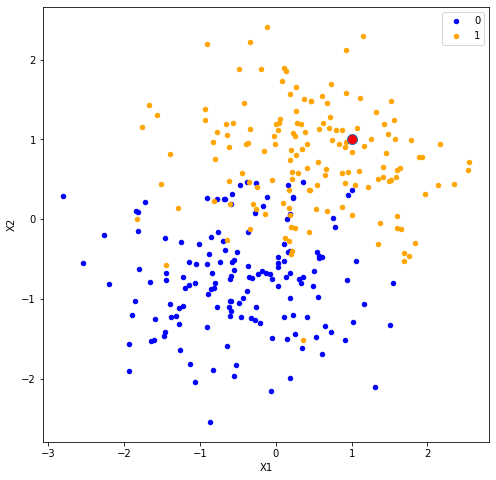

In [8]:
# Plot the data
from matplotlib import pyplot as plt
df = pd.DataFrame(dict(x = X_train[:, 0], y = X_train[:, 1], label = y_train))
colors = {0:'blue', 1: 'orange'}
fig, ax = plt.subplots(figsize = (8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

plt.plot(new_points[1][0], new_points[1][1], marker="o", markersize=10, markerfacecolor="red")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
neighbors = knn.find_nearest_neighbours(X_train, new_points[2])
print(knn.classifier(neighbors, y_train))

0


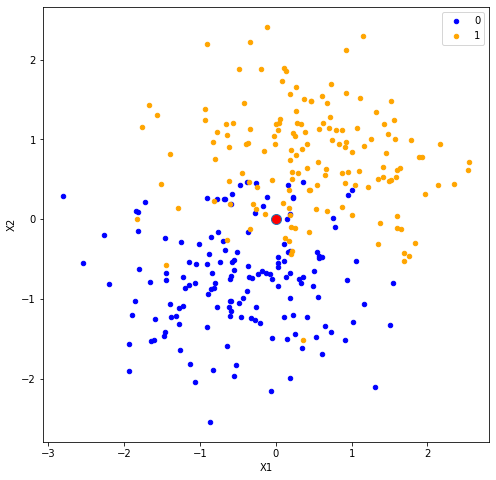

In [10]:
# Plot the data
from matplotlib import pyplot as plt
df = pd.DataFrame(dict(x = X_train[:, 0], y = X_train[:, 1], label = y_train))
colors = {0:'blue', 1: 'orange'}
fig, ax = plt.subplots(figsize = (8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

plt.plot(new_points[2][0], new_points[2][1], marker="o", markersize=10, markerfacecolor="red")
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()